# Machine Learning

- Supervised learning: Models that can predict labels based on labeled training data
    - Classification: Models that predict labels as two or more discrete categories
    - Regression: Models that predict continuous labels

- Unsupervised learning: Models that identify structure in unlabeled data
    - Clustering: Models that detect and identify distinct groups in the data
    - Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data

- Reinforcement learning

- Semi-supervised learning

In [34]:
import numpy as np
import matplotlib.pyplot as plt

## Classificação

In [35]:
import seaborn as sns; 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


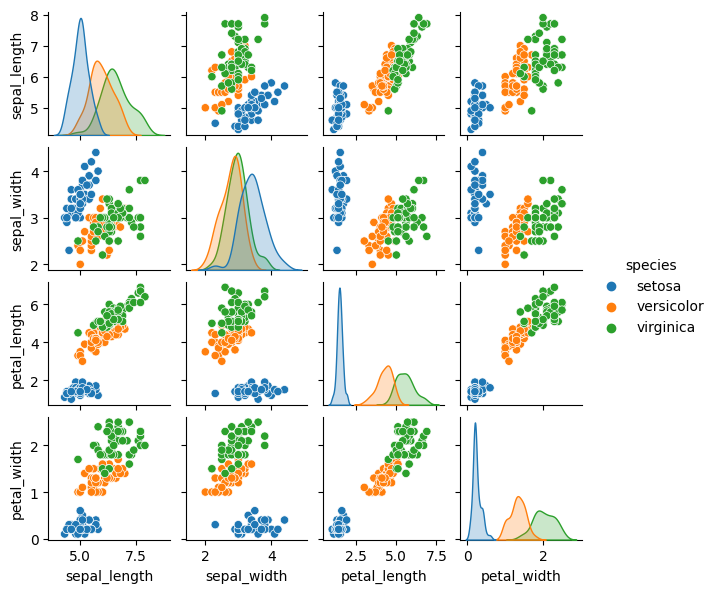

In [36]:
sns.pairplot(iris, hue='species', size=1.5);

In [37]:
### Features Matrix

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [38]:
# Target array
y_iris = iris['species']
y_iris.shape

(150,)

In [39]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_iris,y_iris)


GaussianNB()

In [40]:
clf.predict([[5.1,3.5,1.4,3]])

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['virginica'], dtype='<U10')

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_iris)
y_iris = le.transform(y_iris)
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
from sklearn.inspection import DecisionBoundaryDisplay

feature_1, feature_2 = np.meshgrid(
    np.linspace(iris['petal_width'].min(), iris['petal_width'].max()),
    np.linspace(iris['petal_length'].min(), iris['petal_length'].max())
)

In [43]:
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
clf.fit(X_iris[['petal_width','petal_length']],y_iris)

GaussianNB()

In [44]:
y_pred = np.reshape(clf.predict(grid), feature_1.shape)
y_pred

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

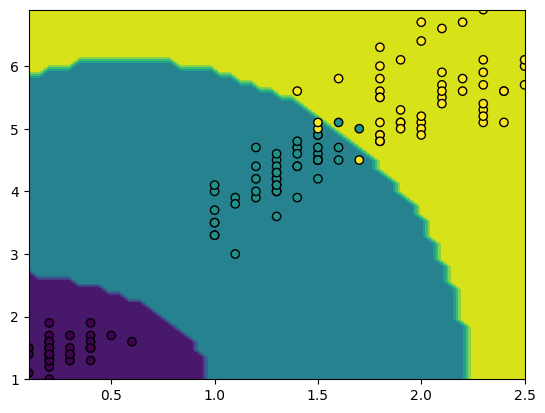

In [45]:
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(iris['petal_width'], iris['petal_length'], c=y_iris, edgecolor="black")

## Redução de dimensionalidade

In [46]:
from sklearn.decomposition import PCA  
model = PCA(n_components=2)            
model.fit(X_iris)                      
X_2D = model.transform(X_iris)
X_2D.shape

(150, 2)

In [47]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X_2D[:,0].min(), X_2D[:,0].max()),
    np.linspace(X_2D[:,1].min(), X_2D[:,1].max())
)

In [48]:
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
clf.fit(X_2D,y_iris)
y_pred = np.reshape(clf.predict(grid), feature_1.shape)


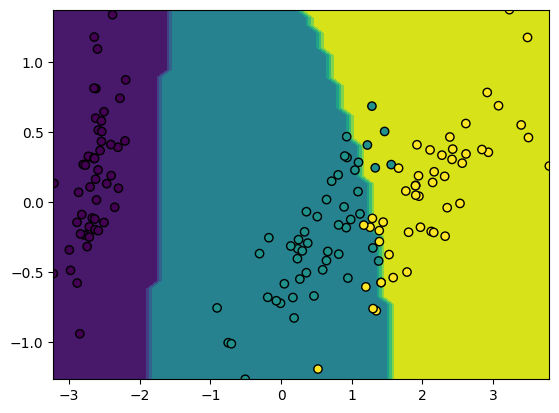

In [49]:
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X_2D[:,0], X_2D[:,1], c=y_iris, edgecolor="black")

### Model Evaluation

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.33, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
clf = GaussianNB()

#### Modelo completo

In [53]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
cval_scores = cross_val_score(clf, X_iris, y_iris, cv=10, scoring='accuracy')
print(f'cval scores: {np.mean(cval_scores):.3f} +- {np.std(cval_scores):.3f}')

0.96
cval scores: 0.953 +- 0.043


#### Modelo Petala 

In [54]:
clf.fit(X_train[['petal_length','petal_width']],y_train)
y_pred = clf.predict(X_test[['petal_length','petal_width']])
print(accuracy_score(y_test,y_pred))
cval_scores = cross_val_score(clf, X_iris[['petal_length','petal_width']], y_iris, cv=10, scoring='accuracy')
print(f'cval scores: {np.mean(cval_scores):.3f} +- {np.std(cval_scores):.3f}')

0.98
cval scores: 0.960 +- 0.044


#### Modelo PCA

In [55]:
pca = PCA(n_components=2)            
pca.fit(X_train)                      
X_2D_train = pca.transform(X_train)
X_2D_train.shape

(100, 2)

In [68]:
clf.fit(X_2D_train,y_train)
X_2D_test = pca.transform(X_test)
y_pred = clf.predict(X_2D_test)
print(accuracy_score(y_test,y_pred))

cval_scores = cross_val_score(clf, pca.transform(X_iris), y_iris, cv=10, scoring='accuracy')
print(f'cval scores: {np.mean(cval_scores):.3f} +- {np.std(cval_scores):.3f}')

0.88
cval scores: 0.900 +- 0.075


## Regressão

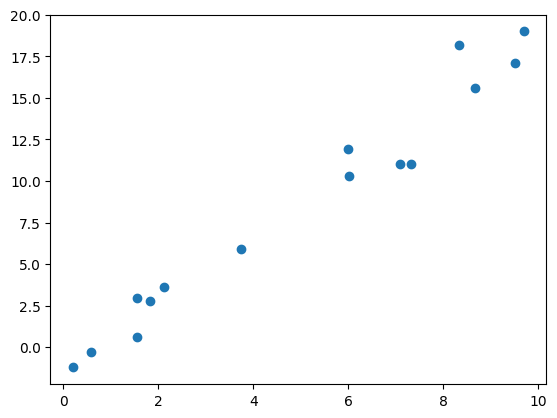

In [57]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(15)
y = 2 * x - 1 + rng.randn(15)
plt.scatter(x, y)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression(fit_intercept=True)

In [60]:
X = x.reshape(x.shape[0],1)
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967]])

In [61]:
model.fit(X, y)

LinearRegression()

In [62]:
model.coef_

array([2.00256249])

In [63]:
model.intercept_

-1.3349601786541374

In [64]:
xfit = np.linspace(-1, 11)
xfit.shape

(50,)

In [65]:
Xfit = xfit.reshape(xfit.shape[0],1)
yfit = model.predict(Xfit)

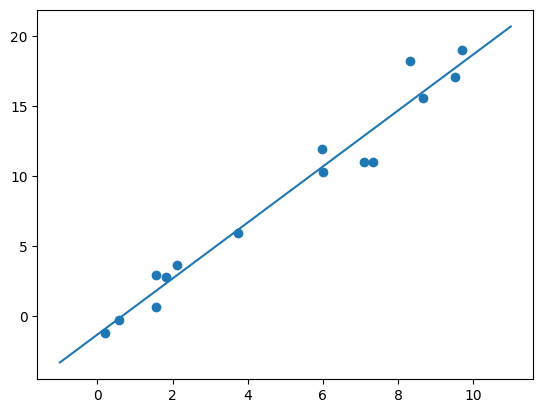

In [66]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Agrupamento (Clustering)

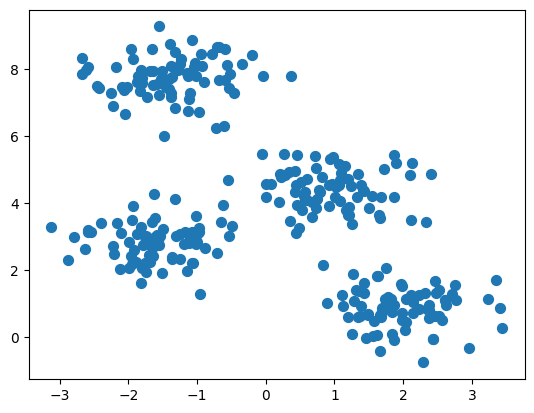

In [69]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


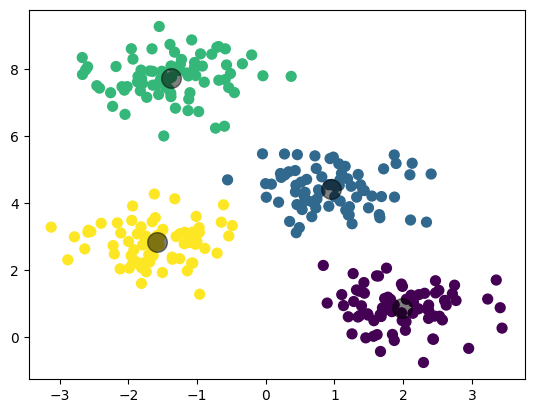

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### Aplicações

- Recommender systems
- Anomaly detection
- Crime analysis
- Plant and animal ecology
- Sequence analysis